In [69]:
# Import necessary libraries
import os
import sktime
import pandas as pd
from sktime.datasets import load_from_tsfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [70]:
# Load time series data
X, y = load_from_tsfile('/Users/PRADEEP SHETTY/Desktop/IEEE internship/final.ts',return_data_type="numpy3d")

In [71]:
print(X.shape)

(1144, 1, 24)


In [72]:
print(X)

[[[  0.     0.     0.   ...  41.53  32.45 148.73]]

 [[  8.     4.08   7.07 ... 120.05  46.52  67.87]]

 [[ 69.7   22.25  11.02 ... 178.12  58.2   36.7 ]]

 ...

 [[  0.     0.     0.   ...   0.     0.     0.  ]]

 [[  0.     0.     0.   ...   0.     0.     0.  ]]

 [[  0.     0.     0.   ...   0.     0.     0.  ]]]


In [79]:
print(X[298])

[[ 134.88    0.      1.53    4.83    4.35    3.4     2.67  113.12   69.52
   274.87  168.68   26.58   22.8     0.      8.15 1046.02    0.      3.9
     0.     11.2     0.      2.82    0.      0.  ]]


In [80]:
# Reshape the time series data
X1 = X.reshape(X.shape[0], (X.shape[1] * X.shape[2]))

In [81]:
print(X1)

[[  0.     0.     0.   ...  41.53  32.45 148.73]
 [  8.     4.08   7.07 ... 120.05  46.52  67.87]
 [ 69.7   22.25  11.02 ... 178.12  58.2   36.7 ]
 ...
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [83]:
# Import TimeSeriesForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [102]:
# Create and fit the classifier
clf = TimeSeriesForestClassifier(n_estimators=200 , random_state=42)
clf.fit(X_train, y_train)

TimeSeriesForestClassifier(random_state=42)

In [96]:
# Make predictions
y_pred = clf.predict(X_test)

In [97]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7727272727272727


In [98]:
# Convert string labels to numerical values
y_test_numerical = y_test.astype(int)

In [99]:
# Calculate the predicted probabilities for the positive class (label 1)
y_pred_probabilities = clf.predict_proba(X_test)[:, 1]

In [100]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_numerical, y_pred_probabilities)
roc_auc = roc_auc_score(y_test_numerical, y_pred_probabilities)

In [101]:
# Print ROC AUC score
print("ROC AUC:", roc_auc)

ROC AUC: 0.8376693349753696


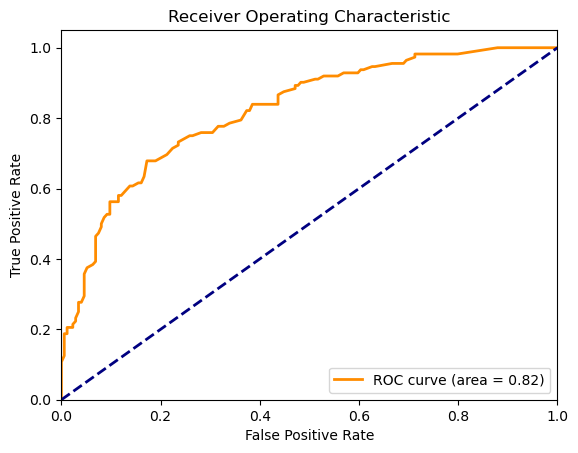

In [94]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()